# Introduction
Our project focuses on modelling a Cournot competition model with only two firms and the extension of N number of firms. The model is a one-shot game with simultaneous output decisions.

# Model description

In this section the theoretical Cournot model will be introduced

## The Cournot model

### Assumptions

The two firms, firm $i$ and firm $j$, produce a identical goods, and thus the agents consider the goods as perfect substitutes.

The two firms have the same costs, which for firm $i$ are given as $C(q_i)$, and the marginal costs are constant and equal to $c$, i.e. $c(q_i) = q_ic_i$.
### Demand 
The two firms are facing the same overall demand from consumers.

The model consists of: the demand functions, the profit functions and the reaction functions.
In a market two firms sell identical good and face inverse demand
<center>$p_i(q_i,q_j) = 1-q_i-bq_j, $</center>
where $b$ determines the elasticity of substitution between the two goods. If $b$ is equal to one, the goods are perfect substitutes, and if, $b<0$ the goods are differentiated
<br>
$Q$ is the total quantity produced in the economy and $q_i$ and $q_j$ are respectively firm $i$ and firm $j$'s production output.

### Pay-off/Profit function
The pay-off definition for each indicidual firm is model the total revenue deducted the costs of the firm producing the good
<center>$\pi_i(q_i,q_j)=p_i(q_i,q_j)-c_iq_i$</center>


### Best-Response function

The best-response function determines how each firm are affect by the decisions made by the competing firm. Here, how firm $i$'s is affected by firm $j$.

<center>$\frac{\delta \pi_i}{\delta q_i}=a-2bq_i-bq_j-c_i=0$</center>
Now, one can solbe for the quantities produces by firm $i$ to get the best-response function of firm $i$
<center>$q_i(q_j)=\frac{1}{2}\left(\frac{a-c}{b}-q_j\right)$</center>
The best-response function of firm $j$ is identical to the one above. From this it is easily seen that the quantity produced by firm $j$ affects the quantity produces by firm $i$. The more goods firm $j$ produces, the less goods will firm $i$ produces.

### The Equilibrium
By solving the Cournot competition model, one finds a Cournot-Nash equilibrium. 

Consider the two best-response function by each firm. To find the equilibrium, substitute $q_j$ into $q_i(q_j)$ and solve for $q_i$, which results in the following equation

<center>$\boxed{q_i=\frac{1}{3}\frac{(a-c)}{b}}$</center>
and as the two firms are identical in this model setup the quantities produced by firm $j$ is thus given as
<center>$\boxed{q_j=\frac{1}{3}\frac{(a-c)}{b}}$</center>
The two quantity equations above reflects the solution to the model. Now, one can find the price of the good given the quantity produced
<center>$\boxed{p=a-b\left(\frac{1}{3}\frac{(a-c)}{b}+\frac{1}{3}\frac{(a-c)}{b}\right) = \frac{1}{3}a+\frac{2}{3}c}$</center>

One can now find the firms pay-off given the quantity produced as price $p$

<center>$\boxed{\pi_i=pq_i-cq_i=\frac{(a+2c)}{3}\frac{(a-c)}{3b}+c\frac{(a-c)}{3b}=\frac{a^2+4ac-5c^2}{9b}}$</center>
    
One can now solve the model using python, and this will be shown in the following sections

# Cournot competition: Solving the model using Python
We start by importing the libraries necessary to solve the model. 

In [96]:
from scipy import optimize,arange,linalg
import sympy as sm
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
sm.init_printing(use_unicode=True)

## Defining the model equations/functions and variables
We can use sympy to find an analytical solution to the Cournot competition model explained above. 

First, we define all the symbols:

Then we define the inverse demand, cost and the pay-off function

In [97]:
#Defining the inverse demand function
def p(qi,qj,b):
    return 1-qi-b*qj

#Defining the cost function
def cost(q,c):
    if q==0:
        cost=0
    else:
        cost = c*q
    return cost
    
#Defining the pay-off function
def payoff(qi,qj,c1,b):
    return p(qi,qj,b)*qi - cost(qi,c1)



Now, all the functions are defined and thus we are ready to find the best-response function boxed in the above section. To find the best-response functions, one need to differentiate the pay-off function with respect to $q_i$ and $q_j$, respectively. As the method brute minimises, we minimize -profit to maximize.

In [98]:
#Best-response function: b
def BR(qj,c1,b):
    qi = optimize.brute(lambda q: -payoff(q,qj,c1,b), ((0,1,),))
    return qi[0]

The next piece of code is a fixed point function to find an equilibrium. The fixed point function is here characterised with $q-f(q)$. The function is looking for a solution for $x^*$ so it equals zero.

In [99]:
def fixedpoint(q,var): # vector param = (b,ci,cj)
    return array(q)-array([BR(q[1],var[1],var[0]),BR(q[0],var[2],var[0])])


## The Cournot competition equilibrium
Now, one can find the Cournot nash-equilibrium. In this exercise we will fokus on zero marginal costs and fixed ccost in production of both firms.  From the scipy.optimize module we use **fsolve** to find the optimal quantities given the parameters in **var**

In [100]:
var = [1,0,0]
q_ini =[0,0]
solution = optimize.fsolve(fixedpoint,q_ini,args=(var))
print(solution)


[0.33332649 0.33332649]


The Cournot equilibrium quantities is thus $q_i=q_j=0.33$. Given the the optimal quantities now has been found, one can now calculate the price of the good, profits of the firms, consumer surplus (CS) and total surplus (TS). This is computed below.

In [101]:
qi_sol=solution[0]
qj_sol=solution[1]
format(qi_sol, '.2f')
format(qj_sol, '.2f')
#Calculating equilibrium price
price_ans = 1-qi_sol-var[0]*qj_sol
format(price_ans, '.2f')
#Aggregate quantities
Q_ans=solution[0]+solution[1]
format(Q_ans, '.2f')
#Profits
i_profit =price_ans*qi_sol #No marginal costs
j_profit =price_ans*qj_sol #No marginal costs
format(i_profit, '.2f')
format(j_profit, '.2f')
#CS and TS
CS = Q_ans*(1-price_ans)/2
TS = (i_profit+j_profit)+CS
format(TS, '.2f')
format(CS, '.2f')
results=[["qi_star", format(qi_sol, '.2f')],
        ["qj_star", format(qj_sol, '.2f')],
        ["p_star", format(price_ans, '.2f')],
        ["Q_star", format(Q_ans, '.2f')],
        ["Profits firm i", format(i_profit, '.2f')],
        ["Profits firm j", format(j_profit, '.2f')],
        ["Total surplus",format(TS, '.2f')],
        ["Consumer surplus",format(CS, '.2f')]]
print(results)

[['qi_star', '0.33'], ['qj_star', '0.33'], ['p_star', '0.33'], ['Q_star', '0.67'], ['Profits firm i', '0.11'], ['Profits firm j', '0.11'], ['Total surplus', '0.44'], ['Consumer surplus', '0.22']]


The following code sets up a table for the solutions in **results**

In [102]:
# Create dataframe
df = pd.DataFrame(results)
df.columns = ['Variable', 'Value']

One can now present the results of the Cournot competition with zero marginal costs

In [103]:
df

,Variable,Value
0,qi_star,0.33
1,qj_star,0.33
2,p_star,0.33
3,Q_star,0.67
4,Profits firm i,0.11
5,Profits firm j,0.11
6,Total surplus,0.44
7,Consumer surplus,0.22


## Extension: Cournot competition with collusion
In this section we look into a situation where the firms collude on output levels. Again, we assume identical marginal costs and is assumed to be zero. 

For the output level to be collusive the level has to satisfy to following restriction

<center>$\pi(q,q\geq (1-\delta)max\pi(\hat{q},q)+\delta\pi(q^*,q^*)$</center>
where $\delta$ is discount factor, $q^*$ is the equilibrium for the firm and $\hat{q}$ is the firm's best response to the other firms output level.
(Vi skal have skrevet lidt mere til teorien)

The following definition is the collusion profit function. When collusion cannot be sustained, the profit of the industry will thus be zero.

In [115]:
def collusion_profits(q,b,c,delta): 
    profits = payoff(q,q,c,b)
    ans = optimize.fsolve(fixedpoint, q_ini, args = ([b,c,c]))
    if profits >= (1-delta)*payoff(BR(q,c,b),q,c,b)+delta*payoff(ans[0],ans[1],c,b):
        industry_profits = 2*profits
    else:
        industry_profits = 0 
    return industry_profits

To investigate the relationship between the the discount factor and profits the following will present a graphical illustration with two values of discout factor, here $0.25$ and $0.9$

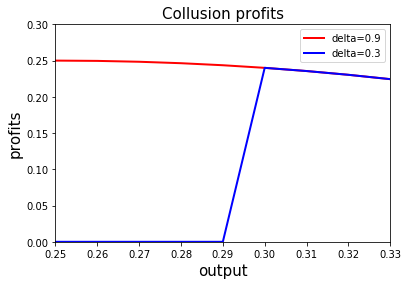

In [120]:
range_q = arange(0.25,solution[0],0.01)
delta1 = 0.9
delta2 = 0.25
range_profits = [collusion_profits(q,1.0,0.0,delta1) for q in range_q]
range_profits2 = [collusion_profits(q,1.0,0.0,delta2) for q in range_q]

plt.clf()

plt.plot(range_q, range_profits,'-', color = 'r', linewidth = 2, label='delta=0.9')
plt.plot(range_q, range_profits2,'-', color = 'b', linewidth = 2, label='delta=0.3')
plt.title("Collusion profits",fontsize = 15)
plt.xlabel("output",fontsize = 15)
plt.ylabel("profits",fontsize = 15,rotation = 90)
plt.xlim(0.25,0.33)
plt.ylim(0.0,0.3)
plt.legend()